# Stage 3:

1) Divide data into train & test samples. (70-30 split)

2) Select features & build xgboost model. You will be judged on roc_auc_score on test sample.

3) Write testcases on all user defined functions using pytest framework. This is one of the most important steps of this interview.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pytest

## Function with Pytest 

In [2]:
def load_data(path,index):
    assert path=='data.csv'
    assert index == 'Unnamed: 0'
    data = pd.read_csv(path , index_col=index )
    return data
    

### assertion error from pytest as we have passed different file 

### intentionally showing pytest error

In [3]:
data = load_data('new_data.csv','Unnamed: 0')

AssertionError: 

In [4]:
data = load_data('data.csv','Unnamed: 0')

## dropping irrelavant columns

In [5]:
def drop_column(data, col):
    assert col in data.columns
    data= data.drop(col,axis=1)
    return data

# pytest error

In [6]:
df = drop_column(data, 'me')

AssertionError: 

In [7]:
# dropping manually created columns
data = drop_column(data,'Growth')

In [8]:
# dropping columns where whole column is filled with just one value
for each in data.columns:
    if(len(list(data[each].value_counts())) ==1):
        data = drop_column(data,each)

In [9]:
#all values are unique...so we can drop such column
for each in data.columns:
    if(len(set(data[each].value_counts())) ==1):
        data = drop_column(data,each)

In [10]:
#columns with only NAN values
data = data.drop(['P) External Funding Allocation','R1) Joint Funding of Investment (with Agencies)'], axis=1)

## dropping columns with excessive NAN values..more than 150 out of 253

In [11]:
count=0
for each in data.columns:
    if ( data[each].isnull().sum() > 150 ):
        data = drop_column(data,each)
        print('dropping ', each)
        count=count+1
print('\ntotal ',count,' variables dropped')

dropping  F2) Secondary Investment Objectives 9
dropping  H) Educational Services or Products Produced 6
dropping  H) Educational Services or Products Produced 8
dropping  H) Educational Services or Products Produced 13
dropping  H) Educational Services or Products Produced 14
dropping  H) Educational Services or Products Produced 15
dropping  H) Educational Services or Products Produced 16
dropping  H) Educational Services or Products Produced 18
dropping  I1) STEM Learners Targeted? Specify. 3
dropping  I1) STEM Learners Targeted? Specify. 4
dropping  I1) STEM Learners Targeted? Specify. 7
dropping  I2) Pre-service-service STEM Teachers Targeted? Specify.
dropping  I4) Adult Learners Targeted?
dropping  I6) K-12 Staff/Administrators Targeted? Specify.
dropping  I8) Post-secondary Staff Targeted? Specify. 1
dropping  I8) Post-secondary Staff Targeted? Specify. 2
dropping  I9) Informal Stem Educators Targeted?
dropping  I10) Other Informal STEM Education Staff Targeted?
dropping  J) Fo

In [12]:
#this column has almost all unique values, hence dropped
data = data.drop('Investment Name',axis=1)

## Label encoding the categorical variables

In [13]:
for col in data.columns:
    if(data[col].dtype=='object'):
        data[col] = data[col].astype('category')
        data[col] = data[col].cat.codes
        data[col] = data[col].replace(-1,np.NaN)

In [14]:
data.head()

,Agency,Subagency,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,F1) Primary Investment Objective,I1) STEM Learners Targeted? Specify.,...,L) Minority Serving Institutions,M) Geographic Region,M) Geographic Region 1,N) STEM Discipline Focus 12,Q) Legislation Required to Shift Focus?,S) Investment Partnerships,U) Measured Outputs,V) Outcomes Measured,X) Evaluated Since 2005?,target
0,10.0,12.0,2002.0,5.24,7.19,5.70,1.0,NaN,2.0,NaN,...,0.0,0.0,2.0,NaN,0.0,3.0,NaN,NaN,1.0,1
1,10.0,9.0,2006.0,14.00,14.00,14.00,1.0,NaN,1.0,1.0,...,0.0,0.0,2.0,NaN,0.0,0.0,NaN,NaN,1.0,1
2,10.0,9.0,2007.0,5.00,5.00,4.37,1.0,NaN,2.0,NaN,...,0.0,0.0,2.0,NaN,0.0,0.0,NaN,0.0,1.0,1
3,10.0,12.0,2002.0,4.57,11.79,4.18,1.0,NaN,1.0,1.0,...,0.0,0.0,2.0,NaN,0.0,0.0,1.0,NaN,1.0,1
4,10.0,12.0,1999.0,1.63,2.74,2.02,1.0,NaN,3.0,1.0,...,0.0,0.0,2.0,NaN,0.0,0.0,NaN,0.0,1.0,1


## imputation

In [15]:
data = data.fillna(data.mean(), inplace=True)

## min-max scaling as funding variables ranges very widely compared to others. (also target variable remain unaffected here..as it has only binary values, i.e., 0 and 1 which is default range of min-max scaler used here)

In [16]:
cols=list(data.columns)

In [17]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data = minmax.fit_transform(data)
data = pd.DataFrame(data=data,columns=cols)

## heatmap

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


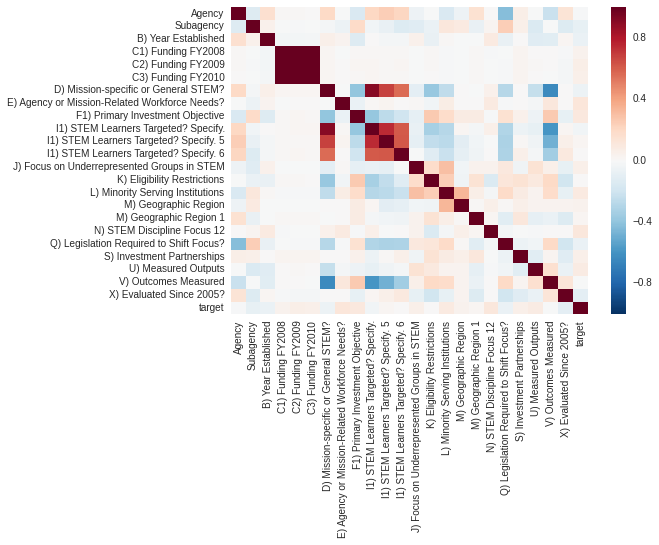

In [18]:
sns.heatmap(data.corr())

## train test split

In [19]:
y = data['target']
X = data.drop('target',axis=1)

## dealing with imbalanced classification..(experimenting it)

In [20]:
from imblearn.combine import SMOTETomek
smotet = SMOTETomek(random_state=0)
X, y = smotet.fit_sample(X, y)
X= pd.DataFrame(X)
y=pd.DataFrame(y)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

## feature importances

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [23]:
xticks = [data.columns[each] for each in indices]

##### here the blue line indicates the possible error in calculating importances of each feature

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


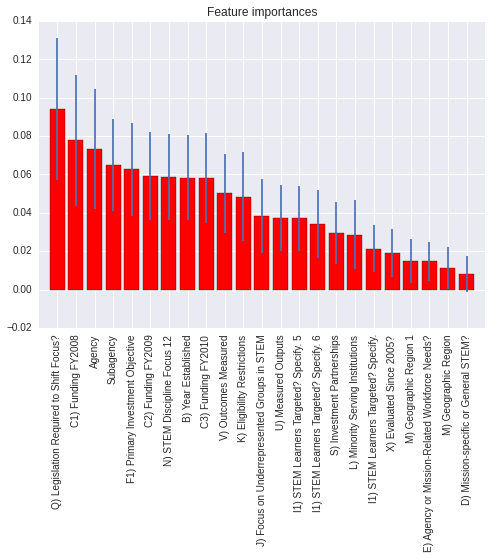

In [24]:
# Plot the feature importances of the forest
#plt.figure(figsize=(100,50))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), xticks,rotation=90)
plt.xlim([-1, X.shape[1]])

plt.show()

## xgboost

### Optimizing parameters of xgboost using GridSearchCV and HyperOpt

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X, y)
df2=pd.DataFrame(xgb.feature_importances_,index=X.columns)

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


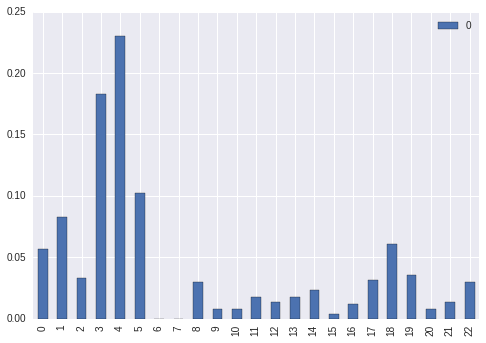

In [27]:
df2=pd.DataFrame(xgb.feature_importances_,index=X.columns)
df2.plot(kind='bar')

### hence considering only those columns having imp >0.04.


In [28]:
X[df2[df2[0]>0.04].index].head()  

,0,1,3,4,5,18
0,0.833333,0.190476,0.001874,0.002143,0.001664,0.0
1,0.833333,0.142857,0.005006,0.004174,0.004087,0.0
2,0.833333,0.142857,0.001788,0.001491,0.001276,0.0
3,0.833333,0.190476,0.001634,0.003515,0.001220,0.0
4,0.833333,0.190476,0.000583,0.000817,0.000590,0.0


In [29]:
X_train,X_test,y_train,y_test= train_test_split( X[df2[df2[0]>0.04].index], y, test_size=0.3,random_state=57)

In [30]:
#gs=GridSearchCV(XGBClassifier(),param_grid={"n_estimators":[10,100,500,1000],"max_depth":[3,4,5,6],"learning_rate":[0.01,0.1,1,2.5]},
#               scoring="roc_auc")
#gs.fit(X_train,y_train)
#gs.best_params_

from sklearn.metrics import roc_auc_score

xgb = XGBClassifier(max_depth=8, learning_rate=0.01, n_estimators=500, silent=True, objective='reg:linear', nthread=-1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=0.7, colsample_bytree=0.7, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
xgb.fit(X_train,y_train,eval_metric='auc')
y_pred = xgb.predict(X_test)
roc_auc_score(y_test,y_pred)

/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9020800627943486

# roc_auc_score: 0.9020800627943486

# roc curve plotting 

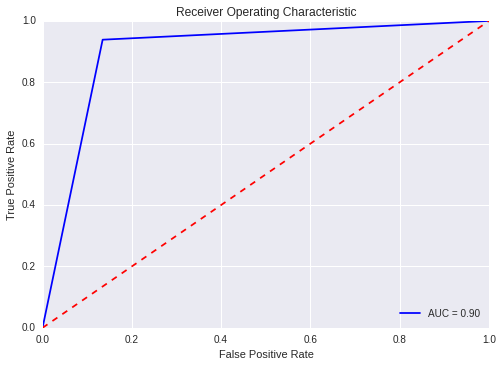

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### other scores

In [31]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, roc_curve, precision_score, auc
accuracy_score(y_test,y_pred)

0.900990099009901

In [32]:
f1_score(y_test,y_pred)

0.9019607843137256

In [33]:
recall_score(y_test,y_pred)

0.9387755102040817

In [34]:
precision_score(y_test,y_pred)

0.8679245283018868

## Hyperopt code

In [ ]:
 
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

 
def objective(space):

    clf = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth=space['max_depth'],
                            
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'])

    

    clf.fit( X_train, y_train)

    pred = clf.predict( X_test) 
    auc = roc_auc_score(y_test, pred)
    print( "SCORE:", auc)

    return{'loss':-auc, 'status': STATUS_OK }


space ={"n_estimators":hp.choice('n_estimators',range(50,200,1)),
        'max_depth': hp.choice('max_depth',range(50,200,1)),
        'min_child_weight': hp.quniform ('x_min_child', 1, 100, 1),
        'subsample': hp.uniform ('x_subsample', 0.8, 1)
    }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)
 